In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [2]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/fetal_health_Data.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

There is zero null value, thats a good thing.

Hiç null değer yok, bu bizim için iyi bir şey.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# EDA

<AxesSubplot: xlabel='fetal_health', ylabel='count'>

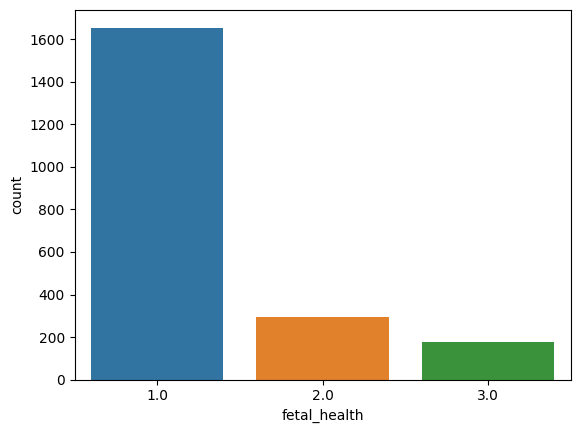

In [7]:
sns.countplot(data= df, x="fetal_health")

[]

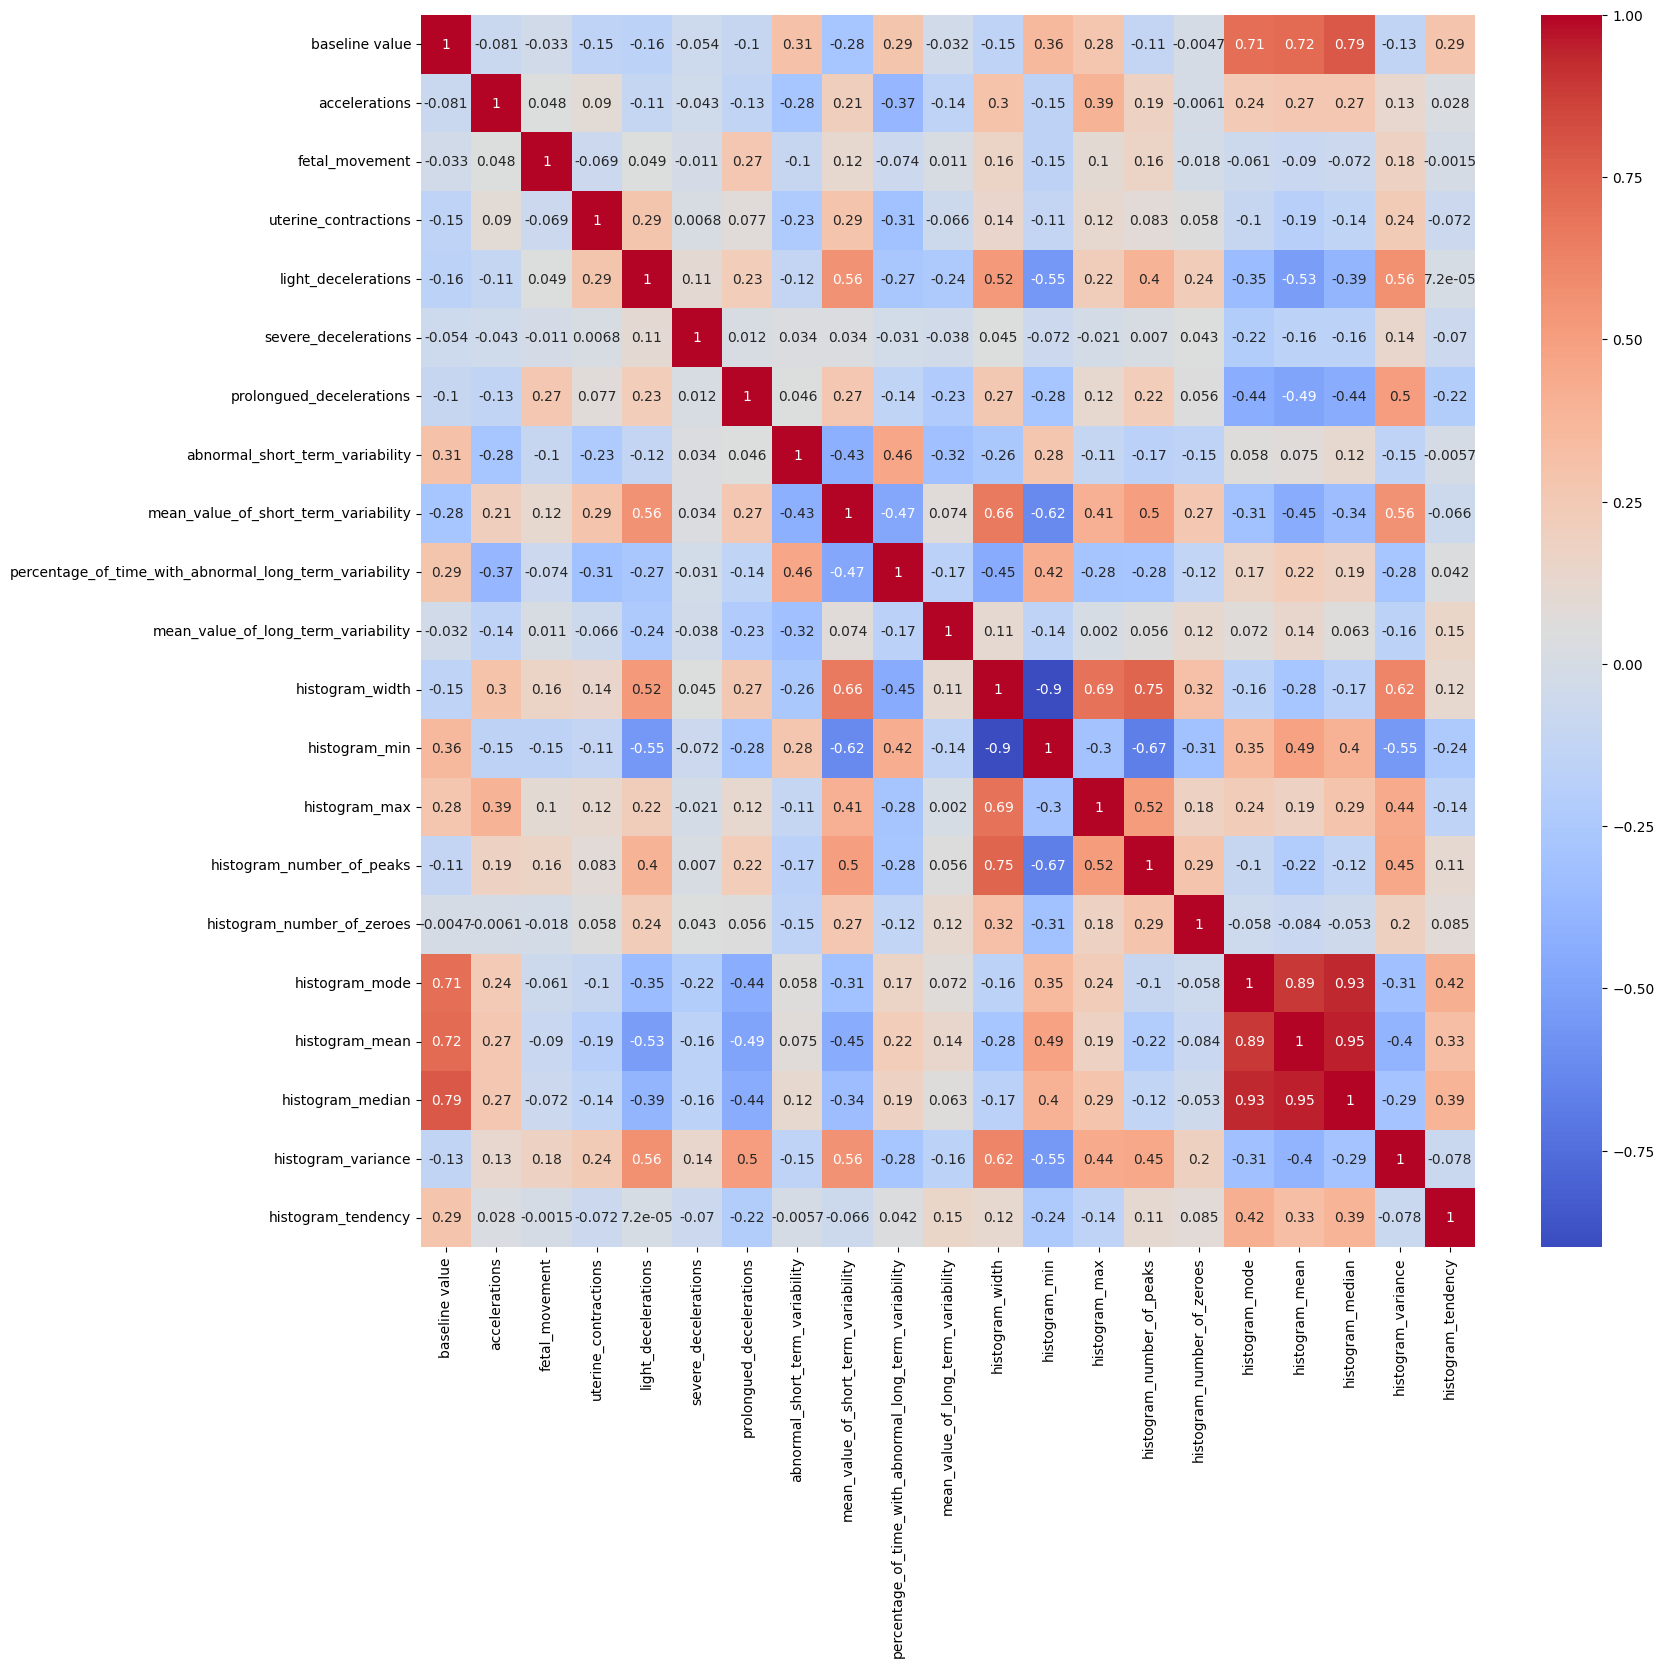

In [8]:
df_without_output = df.drop(['fetal_health'], axis=1)
plt.figure(figsize=(17,16))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

<AxesSubplot: title={'center': 'histogram_median and histogram_mean'}, xlabel='histogram_median', ylabel='histogram_mean'>

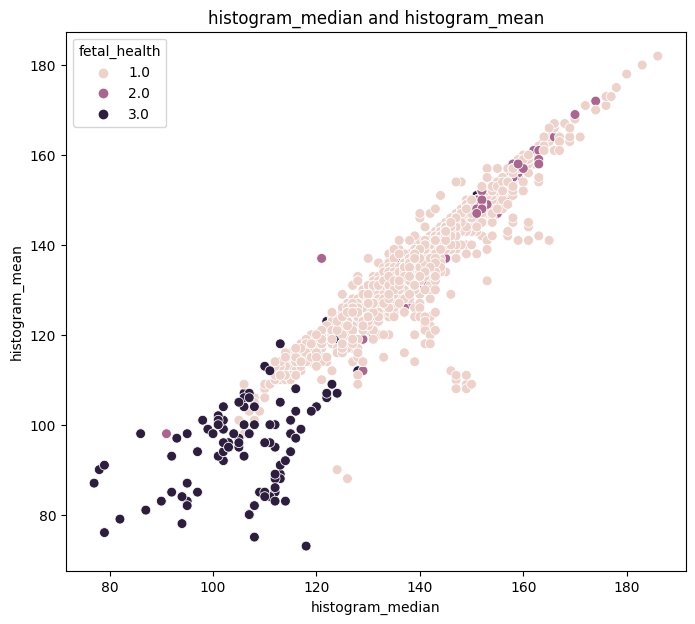

In [9]:
plt.figure(figsize=(8,7))
plt.title('histogram_median and histogram_mean')
sns.scatterplot(data=df,x='histogram_median',y='histogram_mean',hue='fetal_health',s=50)

<AxesSubplot: title={'center': 'histogram_median and histogram_mode'}, xlabel='histogram_median', ylabel='histogram_mode'>

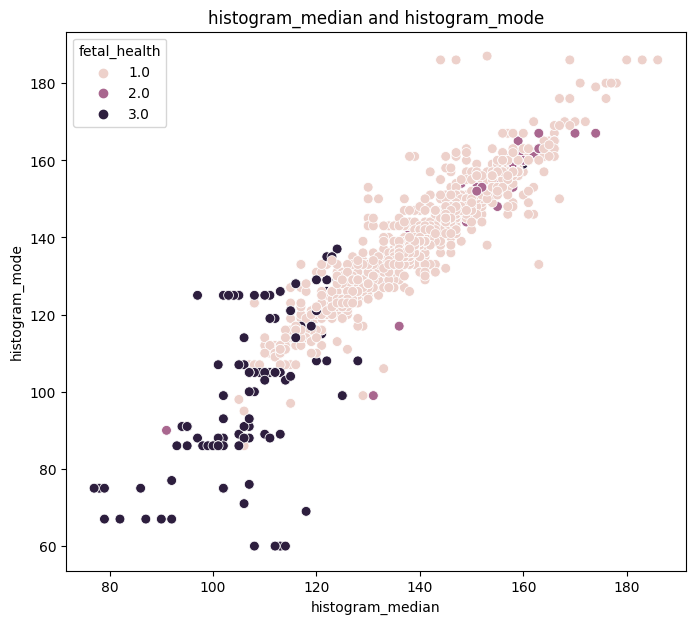

In [10]:
plt.figure(figsize=(8,7))
plt.title('histogram_median and histogram_mode')
sns.scatterplot(data=df,x='histogram_median',y='histogram_mode',hue='fetal_health',s=50)

<AxesSubplot: title={'center': 'histogram_mean and histogram_mode'}, xlabel='histogram_mean', ylabel='histogram_mode'>

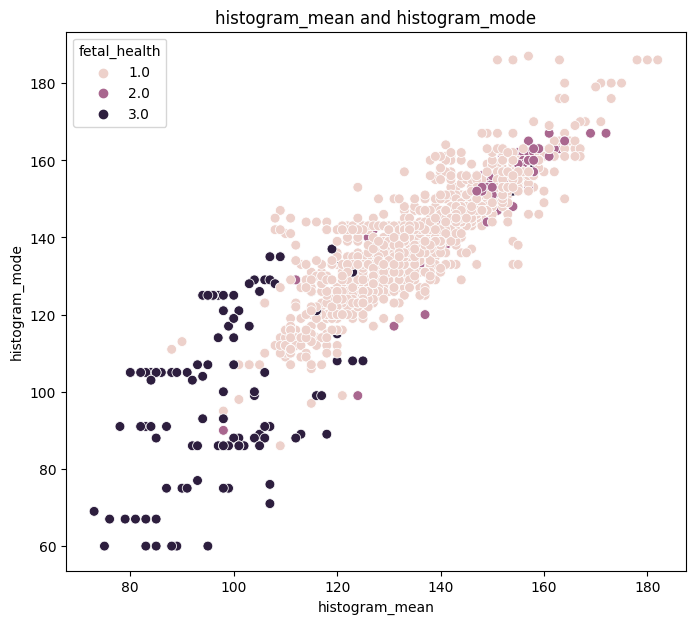

In [11]:
plt.figure(figsize=(8,7))
plt.title('histogram_mean and histogram_mode')
sns.scatterplot(data=df,x='histogram_mean',y='histogram_mode',hue='fetal_health',s=50)

<AxesSubplot: title={'center': 'histogram_median and baseline value'}, xlabel='histogram_median', ylabel='baseline value'>

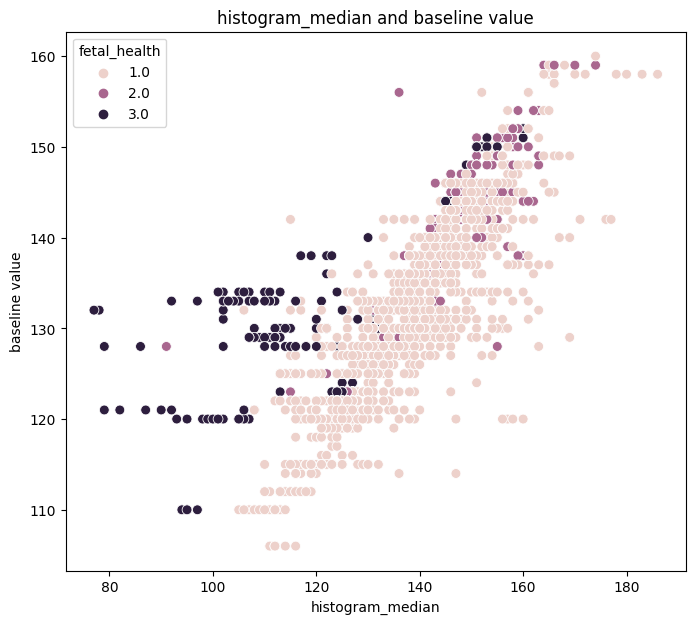

In [12]:
plt.figure(figsize=(8,7))
plt.title('histogram_median and baseline value')
sns.scatterplot(data=df,x='histogram_median',y='baseline value',hue='fetal_health',s=50)

## Uni-Variate Analysis

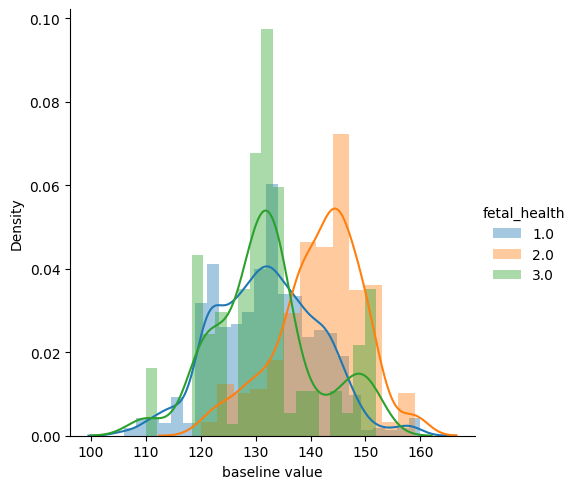

In [13]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'baseline value').add_legend();

sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'histogram_mode').add_legend();

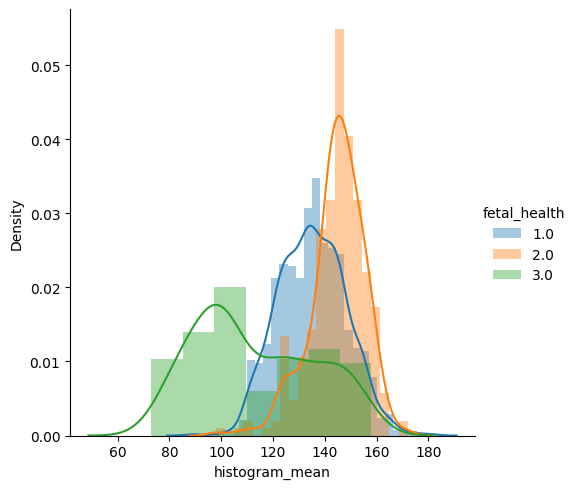

In [14]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'histogram_mean').add_legend();

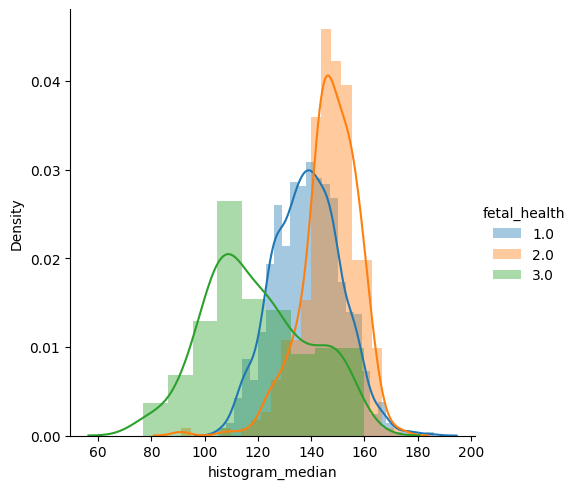

In [15]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'histogram_median').add_legend();

# Classification

### Preparing X and y

In [16]:
X = df.drop(['fetal_health'],axis=1)
y = df.fetal_health

### Train Test data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## Model

### LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# Fit
lr = LogisticRegression()
lr.fit(X_train,y_train)

# prediction
y_pred = lr.predict(X_test)

In [20]:
lr_score = accuracy_score(y_test,y_pred)
print(f"LogisticRegression Score : {(lr_score*100):.2f}%")

LogisticRegression Score : 84.74%


In [21]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[303  13  10]
 [ 31  26   1]
 [  5   5  32]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.89      0.93      0.91       326
         2.0       0.59      0.45      0.51        58
         3.0       0.74      0.76      0.75        42

    accuracy                           0.85       426
   macro avg       0.74      0.71      0.72       426
weighted avg       0.84      0.85      0.84       426



### KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier algoritması için en iyi k yi bulmak için sırasıyla her sayıyı deniyoruz ve grafikle gösteriyoruz sonuçları.

We try each number in order to find the best k for the KNeighborsClassifier algorithm and show the results with graphs.

Max Train Score : 99.88% - K : [1]
Max Test Score : 89.67% - Best K : [1]


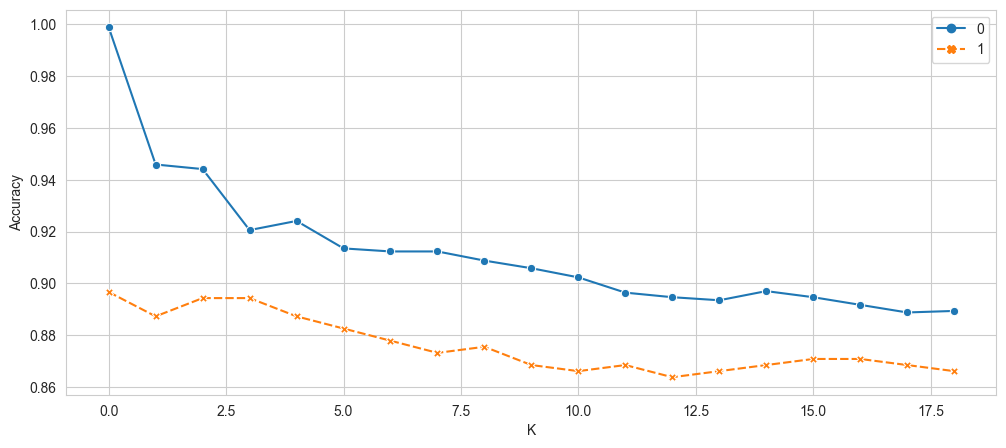

In [24]:
test_train_scores = []

for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    test_train_scores.append((train_score, test_score))

test_train_scores = np.array(test_train_scores)

max_train_score = np.max(test_train_scores[:,0])
train_score_ind = np.where(test_train_scores[:,0] == max_train_score)[0] + 1
max_test_score = np.max(test_train_scores[:,1])
test_score_ind = np.where(test_train_scores[:,1] == max_test_score)[0] + 1

print(f'Max Train Score : {max_train_score * 100:.2f}% - K : {train_score_ind}')
print(f'Max Test Score : {max_test_score * 100:.2f}% - Best K : {test_score_ind}')

sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
sns.lineplot(data=test_train_scores, markers=True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [25]:
# Fit
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)

In [26]:
# Evaluate the performance of the model
knn_score = accuracy_score(y_test, y_pred)
print(f"KNeighborsClassifier Score : {(knn_score*100):.2f}%")

KNeighborsClassifier Score : 84.74%


In [27]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[303  13  10]
 [ 31  26   1]
 [  5   5  32]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.89      0.93      0.91       326
         2.0       0.59      0.45      0.51        58
         3.0       0.74      0.76      0.75        42

    accuracy                           0.85       426
   macro avg       0.74      0.71      0.72       426
weighted avg       0.84      0.85      0.84       426



### GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
# Train the Random Forest classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = gnb.predict(X_test)

In [31]:
# Evaluate the performance of the model
gnb_score = accuracy_score(y_test, y_pred)
print(f"GaussianNB Score : {(gnb_score*100):.2f}%")

GaussianNB Score : 78.87%


In [32]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[261  49  16]
 [  8  48   2]
 [  2  13  27]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.80      0.87       326
         2.0       0.44      0.83      0.57        58
         3.0       0.60      0.64      0.62        42

    accuracy                           0.79       426
   macro avg       0.67      0.76      0.69       426
weighted avg       0.86      0.79      0.81       426



### RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = rfc.predict(X_test)

In [36]:
# Evaluate the performance of the model
rfc_score = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Score : {(rfc_score*100):.2f}%")

RandomForestClassifier Score : 94.13%


In [37]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[319   6   1]
 [ 13  44   1]
 [  1   3  38]]


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       326
         2.0       0.83      0.76      0.79        58
         3.0       0.95      0.90      0.93        42

    accuracy                           0.94       426
   macro avg       0.91      0.88      0.90       426
weighted avg       0.94      0.94      0.94       426



# Özet / Summary

Test yüzdesi %20 olarak ayarladığımız zaman RandomForestClassifier sınıflandırması ile %94 gibi iyi bir sonuç elde ettik, bu sonucu artırmak için verisetinin kapasitesini artırabiliriz.

When we set the test percentage to 20%, we got a good result of 94% with RandomForestClassifier classification, we can increase the capacity of the dataset to increase this result.